In [1]:
import qmcpy as qp
import numpy as np
import scipy.stats
import math
#import pandas as pd
import time
#from matplotlib import pyplot
#pyplot.style.use('../qmcpy/qmcpy.mplstyle')
#colors = pyplot.rcParams['axes.prop_cycle'].by_key()['color']
print('ok')

ok


We generated our points in $d$ dimensions and generated $n$ samples such that $\boldsymbol{x}_i \in [0,1]^d$ for $i = 1, 2, 3, ..., n$. Let matrix $\boldsymbol{X}$ be a $n \times d$ matrix such that
$$
\boldsymbol{X} = 
\begin{bmatrix}
\boldsymbol{x}_1\\
\boldsymbol{x}_2\\
\boldsymbol{x}_3\\
...\\
\boldsymbol{x}_n\\
\end{bmatrix}
$$
which can be rewritten as
$$
\boldsymbol{X} = 
\begin{bmatrix}
\boldsymbol{x}_{1_1} & \boldsymbol{x}_{1_2} & \boldsymbol{x}_{1_3} & ... & \boldsymbol{x}_{1_d}\\
\boldsymbol{x}_{2_1} & \boldsymbol{x}_{2_2} & \boldsymbol{x}_{2_3} & ... & \boldsymbol{x}_{2_d}\\
\boldsymbol{x}_{3_1} & \boldsymbol{x}_{3_2} & \boldsymbol{x}_{3_3} & ... & \boldsymbol{x}_{3_d}\\
... & ... & ... & ... & ...\\
\boldsymbol{x}_{n_1} & \boldsymbol{x}_{n_2} & \boldsymbol{x}_{n_3} & ... & \boldsymbol{x}_{n_d}\\
\end{bmatrix}
$$

We want to find our discrepancy in star discrepancy we must calculate
$$
[D(\boldsymbol{X}) ]^2= \underbrace{\int_{[0,1]^d} \int_{[0,1]^d} K(x,y)~dx~dy}_{A} - \frac{2}{n} \sum_{i=1}^n \underbrace{\int_{[0,1]^d} K(x, \boldsymbol{x}_i) ~dx}_{B(\boldsymbol{x}_i)} + \frac{1}{n^2} \sum_{i,j = 1}^n K(\boldsymbol{x}_i, \boldsymbol{x}_j)
$$
Note, the kernel for star discrepancy is $K(\boldsymbol{x}_i,\boldsymbol{x}_j) = \prod_{k=1}^d [2 - \max(\boldsymbol{x}_{i_k}, \boldsymbol{x}_{j_k})]$. Also, $\int_{[0,1]^d} \int_{[0,1]^d} K(x,y)~dx~dy = (\frac{4}{3})^d$ and $\frac{2}{n} \sum_{i=1}^n \int_{[0,1]^d} K(x, \boldsymbol{x}_i) ~dx = \prod_{k=1}^d (\frac{3 - \boldsymbol{x}_{i_k}^2}{2})$. For the sake of program let,
$$
A = \int_{[0,1]^d} \int_{[0,1]^d} K(x,y)~dx~dy = (\frac{4}{3})^d
$$
$$
B = \frac{2}{n} \sum_{i=1}^n \int_{[0,1]^d} K(x, \boldsymbol{x}_i) ~dx = \prod_{k=1}^d (\frac{3 - \boldsymbol{x}_{i_k}^2}{2})
$$
$$
C = \frac{1}{n^2} \sum_{i,j = 1}^n \prod_{k=1}^d [2 - \max(\boldsymbol{x}_{i_k}, \boldsymbol{x}_{j_k})]
$$
So, $D(\boldsymbol{X}) = \sqrt{A - B + C}$. We calculate

In [2]:
def star_disc(x):
    n, d = x.shape

    A = (4/3)**d

    b_1 = (3-x**2)/2
    b_2 = b_1.prod(axis=1)
    B = 2*np.mean(b_2)

    c_1 = np.zeros((n,n,d)) + x
    y = np.resize(x, (n, 1, d))
    c_2 = 2 - np.maximum(c_1, y)
    c_3 = c_2.prod(axis=2)
    c_4 = np.mean(c_3)
    C = np.mean(c_4)

    disc = (A - B + C)**.5
    return disc

We want to find our discrepancy in L2star discrepancy. The equation to find the discrepancy is the same except we choose a different equation for the kernel. Which our kernel is $K(x,y) = \prod_{k=1}^d (1 - \max(x_k,y_k))$. And so to get our discrepancy we must calculate
$$
[D(\boldsymbol{X}) ]^2= \int_{[0,1]^d} \int_{[0,1]^d} K(x,y)~dx~dy - \frac{2}{n} \sum_{i=1}^n \int_{[0,1]^d} K(x, \boldsymbol{x}_i) ~dx + \frac{1}{n^2} \sum_{i,j = 1}^n K(\boldsymbol{x}_i, \boldsymbol{x}_j)
$$
$$
[D(\boldsymbol{X}) ]^2= (1/3)^d - \frac{2}{n} \sum_{i=1}^n \prod_{k=1}^d (\frac{1 - \boldsymbol{x}_{i_k}^2}{2}) + \frac{1}{n^2} \sum_{i,j = 1}^n \prod_{k=1}^d (1 - \max(\boldsymbol{x}_{i_k}, \boldsymbol{x}_{j_k}))
$$
$$
D(\boldsymbol{X}) = \sqrt{(1/3)^d - \frac{2}{n} \sum_{i=1}^n \prod_{k=1}^d (\frac{1 - \boldsymbol{x}_{i_k}^2}{2}) + \frac{1}{n^2} \sum_{i,j = 1}^n \prod_{k=1}^d (1 - \max(\boldsymbol{x}_{i_k}, \boldsymbol{x}_{j_k}))}
$$
So now let A, B, and C be calculated as

$$
A = \int_{[0,1]^d} \int_{[0,1]^d} K(x,y)~dx~dy = (\frac{1}{3})^d
$$
$$
B = \frac{2}{n} \sum_{i=1}^n \int_{[0,1]^d} K(x, \boldsymbol{x}_i) ~dx = \prod_{k=1}^d (\frac{1 - \boldsymbol{x}_{i_k}^2}{2})
$$
$$
C = \frac{1}{n^2} \sum_{i,j = 1}^n \prod_{k=1}^d (1 - \max(x_k,y_k))
$$
So, $D(\boldsymbol{X}) = \sqrt{A - B + C}$. We calculate

In [3]:
def L2star_disc(x):
    n, d = x.shape

    A = (1/3)**d

    b_1 = (1 - x**2)/2
    b_2 = b_1.prod(axis=1)
    B = 2*np.mean(b_2)
    print(B)
    c_1 = np.zeros((n,n,d)) + x
    y = np.resize(x, (n, 1, d))
    c_2 = 1 - np.maximum(c_1, y)
    c_3 = c_2.prod(axis=2)
    c_4 = np.mean(c_3)
    C = np.mean(c_4)

    disc = (A - B + C)**.5
    return disc

We want to find our discrepancy in centered discrepancy. We will choose our kernel to be $K(x,y) = \prod_{k=1}^d (1 + .5|\boldsymbol{x}_k - .5| + .5|\boldsymbol{y}_k - .5| - .5 |\boldsymbol{x}_k - \boldsymbol{y}_k|)$. And so to get our discrepancy we must calculate
$$
[D(\boldsymbol{X}) ]^2= \int_{[0,1]^d} \int_{[0,1]^d} K(x,y)~dx~dy - \frac{2}{n} \sum_{i=1}^n \int_{[0,1]^d} K(x, \boldsymbol{x}_i) ~dx + \frac{1}{n^2} \sum_{i,j = 1}^n K(\boldsymbol{x}_i, \boldsymbol{x}_j)
$$
$$
[D(\boldsymbol{X}) ]^2= (13/12)^d - \frac{2}{n} \sum_{i=1}^n \prod_{k=1}^d (1 + .5|\boldsymbol{x}_{i_k} - .5| - .5 (\boldsymbol{x}_{i_k} -.5)^2) + \frac{1}{n^2} \sum_{i,j = 1}^n \prod_{k=1}^d (1 + .5|\boldsymbol{x}_{i_k} - .5| + .5|\boldsymbol{x}_{j_k} - .5| - .5 |\boldsymbol{x}_{i_k} - \boldsymbol{x}_{j_k}|)
$$
$$
D(\boldsymbol{X}) = \sqrt{(13/12)^d - \frac{2}{n} \sum_{i=1}^n \prod_{k=1}^d (1 + .5|\boldsymbol{x}_{i_k} - .5| - .5 (\boldsymbol{x}_{i_k} -.5)^2) + \frac{1}{n^2} \sum_{i,j = 1}^n \prod_{k=1}^d (1 + .5|\boldsymbol{x}_{i_k} - .5| + .5|\boldsymbol{x}_{j_k} - .5| - .5 |\boldsymbol{x}_{i_k} - \boldsymbol{x}_{j_k}|)}
$$
Let A, B, and C be calculated as

$$
A = \int_{[0,1]^d} \int_{[0,1]^d} K(x,y)~dx~dy = (\frac{13}{12})^d
$$
$$
B = \frac{2}{n} \sum_{i=1}^n \int_{[0,1]^d} K(x, \boldsymbol{x}_i) ~dx = \frac{2}{n} \sum_{i=1}^n \prod_{k=1}^d (1 + .5|\boldsymbol{x}_{i_k} - .5| - .5 (\boldsymbol{x}_{i_k} -.5)^2)
$$
$$
C = \frac{1}{n^2} \sum_{i,j = 1}^n \prod_{k=1}^d (1 + .5|\boldsymbol{x}_{i_k} - .5| + .5|\boldsymbol{x}_{j_k} - .5| - .5 |\boldsymbol{x}_{i_k} - \boldsymbol{x}_{j_k}|)
$$
Of course $D(\boldsymbol{X}) = \sqrt{A - B + C}$. So now we calculate,

In [4]:
def center_disc(x):
    n, d = x.shape

    A = (13/12)**d

    b_1 = 1 + (.5*abs(x - .5)) - (.5*((x -.5)**2))
    b_2 = b_1.prod(axis=1)
    B = 2*np.mean(b_2)

    c_1 = np.zeros((n,n,d)) + x
    y = np.resize(x, (n, 1, d))
    c_2 = 1 + (.5*abs(c_1 - .5)) + (.5*abs(y - .5)) - (.5*abs(c_1 - y))
    c_3 = c_2.prod(axis=2)
    c_4 = np.mean(c_3)
    C = np.mean(c_4)
    print(C)

    disc = (A - B + C)**.5
    return disc

We want to find our discrepancy in symmetric discrepancy. We will choose our kernel to be $K(x,y) = \prod_{k=1}^d (2 - 2|\boldsymbol{x}_k - \boldsymbol{y}_k|)$. And so to get our discrepancy we must calculate
$$
[D(\boldsymbol{X}) ]^2= \int_{[0,1]^d} \int_{[0,1]^d} K(x,y)~dx~dy - \frac{2}{n} \sum_{i=1}^n \int_{[0,1]^d} K(x, \boldsymbol{x}_i) ~dx + \frac{1}{n^2} \sum_{i,j = 1}^n K(\boldsymbol{x}_i, \boldsymbol{x}_j)
$$
$$
[D(\boldsymbol{X}) ]^2= (4/3)^d - \frac{2}{n} \sum_{i=1}^n \prod_{k=1}^d (1 + 2\boldsymbol{x}_{i_k} - 2 \boldsymbol{x}_{i_k}^2) + \frac{1}{n^2} \sum_{i,j = 1}^n \prod_{k=1}^d (2 - 2|\boldsymbol{x}_{i_k} - \boldsymbol{x}_{j_k}|)
$$
$$
D(\boldsymbol{X}) = \sqrt{(4/3)^d - \frac{2}{n} \sum_{i=1}^n \prod_{k=1}^d (1 + 2\boldsymbol{x}_{i_k} - 2 \boldsymbol{x}_{i_k}^2) + \frac{1}{n^2} \sum_{i,j = 1}^n \prod_{k=1}^d (2 - 2|\boldsymbol{x}_{i_k} - \boldsymbol{x}_{j_k}|)}
$$
Let A, B, and C be calculated as

$$
A = \int_{[0,1]^d} \int_{[0,1]^d} K(x,y)~dx~dy = (\frac{4}{3})^d
$$
$$
B = \frac{2}{n} \sum_{i=1}^n \int_{[0,1]^d} K(x, \boldsymbol{x}_i) ~dx = \frac{2}{n} \sum_{i=1}^n \prod_{k=1}^d (1 + 2\boldsymbol{x}_{i_k} - 2 \boldsymbol{x}_{i_k}^2)
$$
$$
C = \frac{1}{n^2} \sum_{i,j = 1}^n \prod_{k=1}^d (2 - 2|\boldsymbol{x}_{i_k} - \boldsymbol{x}_{j_k}|)
$$
Of course $D(\boldsymbol{X}) = \sqrt{A - B + C}$. So now we calculate,

In [5]:
def symmetric_disc(x):
    n, d = x.shape

    A = (4/3)**d

    b_1 = 1 + 2*x - (2*(x**2))
    b_2 = b_1.prod(axis=1)
    B = 2*np.mean(b_2)

    c_1 = np.zeros((n,n,d)) + x
    y = np.resize(x, (n, 1, d))
    c_2 = 2 - (2*abs(c_1 - y))
    c_3 = c_2.prod(axis=2)
    c_4 = np.mean(c_3)
    C = np.mean(c_4)

    disc = (A - B + C)**.5
    return disc

Now we want to do our wrap around discrepancy. Of course, to calculate it we have
$$
D(\boldsymbol{X}) = \sqrt{ -(4/3)^d + \frac{1}{n^2} \sum_{i,j = 1}^n \prod_{k=1}^d (\frac{3}{2} - |\boldsymbol{x}_{i_k} - \boldsymbol{x}_{j_k}|(1 - |\boldsymbol{x}_{i_k} - \boldsymbol{x}_{j_k}|))}
$$
Since there are only 2 parts, let
$$
A = -(\frac{4}{3})^d
$$
$$
B = \frac{1}{n^2} \sum_{i,j = 1}^n \prod_{k=1}^d (\frac{3}{2} - |\boldsymbol{x}_{i_k} - \boldsymbol{x}_{j_k}|(1 - |\boldsymbol{x}_{i_k} - \boldsymbol{x}_{j_k}|))
$$
So the equation becomes $D(\boldsymbol{X}) = \sqrt{A+B}$. We calculate

In [6]:
def wrap_around_disc(x):
    n, d = x.shape

    A = -(4/3)**d
    
    b_1 = np.zeros((n,n,d)) + x
    y = np.resize(x, (n, 1, d))
    b_2 = 1.5 - (abs(b_1 - y)*(1 - abs(b_1 - y)))
    b_3 = b_2.prod(axis=2)
    b_4 = np.mean(b_3)
    B = np.mean(b_4)

    disc = (A + B)**.5
    return disc

This and next cell are play cells. So the L2-star discrepancy works just as accurately as the scipy discrepancy; however, confused on the centered discrepancy because in my code I square root to get $D(\boldsymbol{X})$. However in scipy that doesn't seem to be the case. To prove it. I printed out the following outputs. So for the centered discrepancy, this would mean that either I was not suppose to square root or scipy forgot to square root.

In [7]:
A = qp.IIDStdUniform(dimension=3)
X = A.gen_samples(n=1024)
print("L2-star")
print(L2star_disc(X))
print(scipy.stats.qmc.discrepancy(X, method='L2-star'))
print("centered")
print(center_disc(X))
print(scipy.stats.qmc.discrepancy(X, method='CD'))
print(scipy.stats.qmc.discrepancy(X, method='CD')**.5)
print("wrap around")
print(wrap_around_disc(X))
print(scipy.stats.qmc.discrepancy(X, method='WD'))
print(scipy.stats.qmc.discrepancy(X, method='WD')**.5)

L2-star
0.0696975982568541
0.0127274970518015
0.01272749705180041
centered
1.2758428381230107
0.02910120692365287
0.000846880244330217
0.029101206922226043
wrap around
0.02668532875463519
0.0007121067705546658
0.026685328751107146


In [8]:
A = qp.IIDStdUniform(dimension=3)
X = A.gen_samples(n=1024)
star_disc(X)
limiter = 1024
n, d = X.shape  #initialize the list as empty

X_expanded = np.resize(X, (1, n, d))
Y = np.resize(X, (n, 1, d))
iterated_X = []
iterated_X_expanded = []
iterated_Y = []

for i_1 in range(int(n/limiter)+1):               #These 4 lines are used to make these lists into chunks
    iterated_X = iterated_X + [X[i_1*limiter: (i_1+1)*limiter, :]]
    iterated_X_expanded = iterated_X_expanded + [X_expanded[:, i_1*limiter: (i_1+1)*limiter, :]]
    iterated_Y = iterated_Y + [Y[i_1*limiter: (i_1+1)*limiter, :, :]]


if n%limiter == 0:
    iterated_X = iterated_X[0: len(iterated_X) - 1]
    iterated_X_expanded = iterated_X_expanded[0:len(iterated_X_expanded)-1]
    iterated_Y = iterated_Y[0:len(iterated_Y)-1]

DI = (1 + (weight/3)).prod(axis=0)

B = 0
for j in range(len(iterated_X)):
    x = iterated_X[j]
    single_integral = ((1 + (weight*(1 - x**2)/2))).prod(axis=1)
    B = B + np.sum(single_integral)

SI = B*2/n

C = 0
for j in range(len(iterated_X_expanded)):
    for i in range(len(iterated_Y)):
        x = iterated_X_expanded[j]
        y = iterated_Y[i]
        kernel = (1 + weight*(1 - np.maximum(X_expanded, Y))).prod(axis=2)
        C = C + np.sum(np.sum(kernel))

K = C/(n**2)

NameError: name 'weight' is not defined

In [ ]:
A = qp.IIDStdUniform(dimension=3)
X = A.gen_samples(n=1024)
print(qp.discrepancy2('l2star', X, limiter = 2**14, Time = True))

start = time.time()
print(star_disc(X))
end = time.time()
print(end - start)

def A(d, weight):
    return (1 + (weight/3)).prod(axis=0)
def B(x, weight):
    return ((1 + (weight*(1 - x**2)/2))).prod(axis=1)
def C(x, y, weight):
    return (1 + weight*(1 - np.maximum(x, y))).prod(axis=2)
print(qp.discrepancy2((A, B, C), X, limiter = 2**14, Time = True))

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


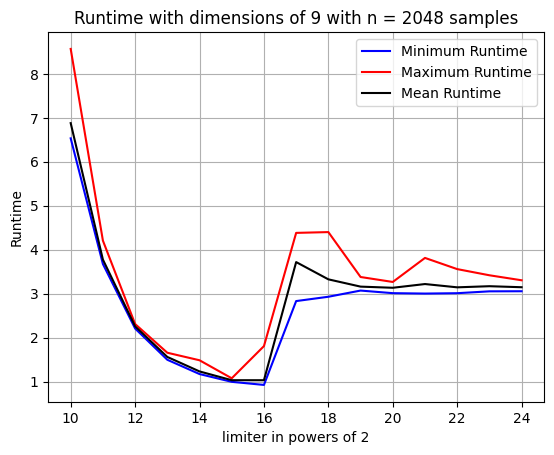

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


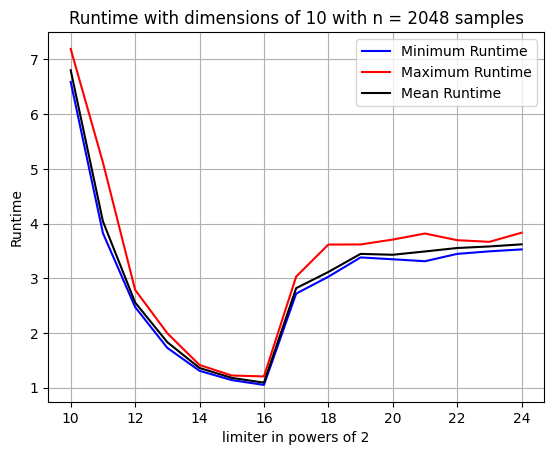

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


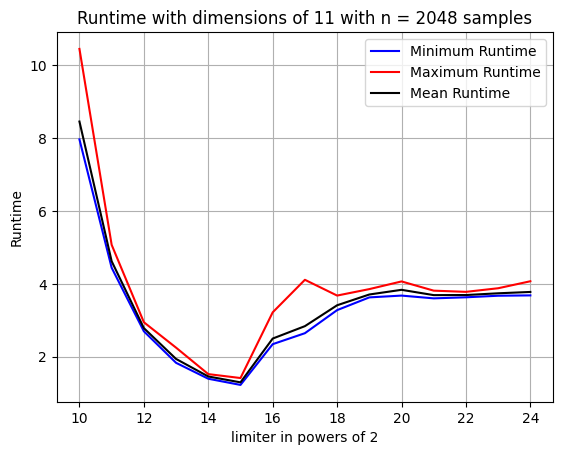

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


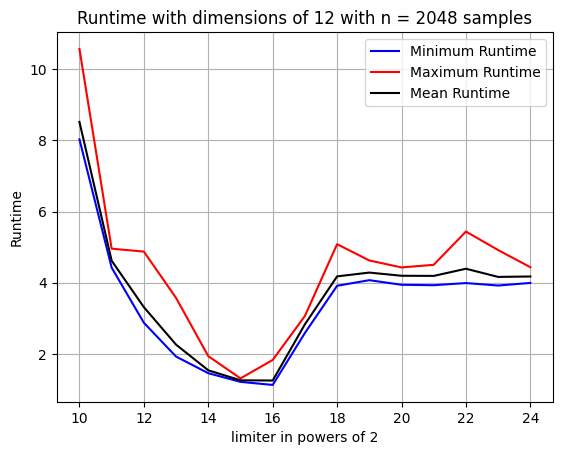

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


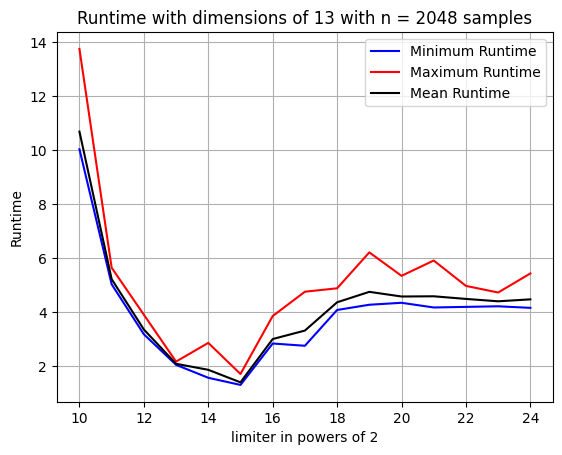

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


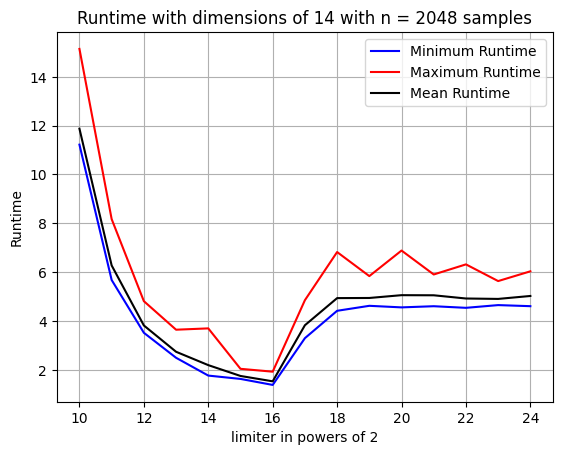

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


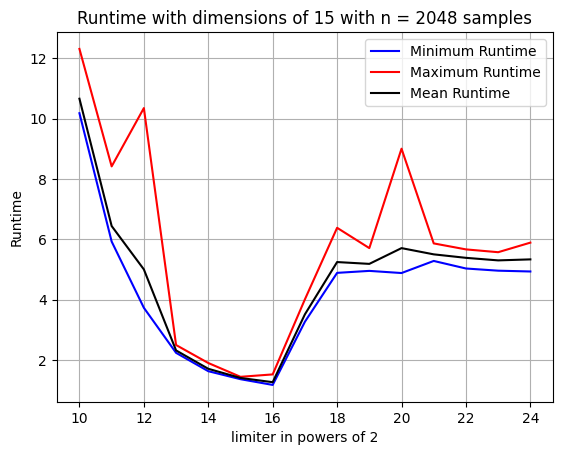

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


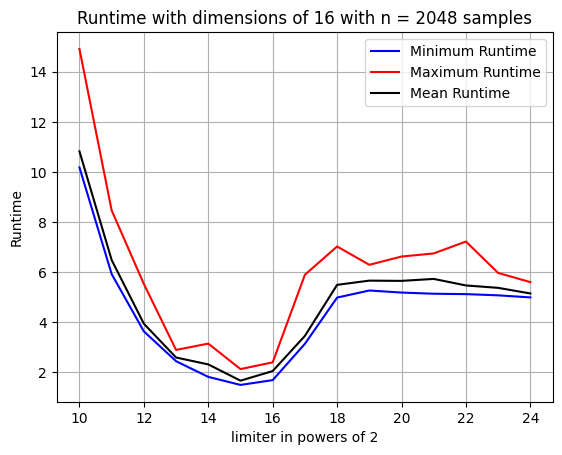

In [23]:
import matplotlib.pyplot as plt

for i in range(9, 17):
    A = qp.IIDStdUniform(dimension=i)
    X = A.gen_samples(n=2**12)
    min_x = []
    min_y = []
    max_x = []
    max_y = []
    mean_x = []
    mean_y = []
    for j in range(10, 25):
        print(j)
        samples = []
        for k in range(20):
            sol, t = qp.discrepancy2('l2star', X, limiter = 2**j, Time = True)
            samples = samples + [t]
        min_x = min_x + [j]
        min_y = min_y + [min(samples)]
        max_x = max_x + [j]
        max_y = max_y + [max(samples)]
        mean_x = mean_x + [j]
        mean_y = mean_y + [np.mean(samples)]
        
    plt.plot(min_x, min_y, label = 'Minimum Runtime', color = 'b')
    plt.plot(max_x, max_y, label = 'Maximum Runtime', color = 'r')
    plt.plot(mean_x, mean_y, label = 'Mean Runtime', color = 'k')
    plt.xlabel("limiter in powers of 2")
    plt.ylabel("Runtime")
    plt.title("Runtime with dimensions of " + str(i) + ' with n = 2048 samples')
    plt.grid(True)  # Add grid lines
    plt.legend()
    plt.show()   

In [21]:
Claude(.001)

NameError: name 'Claude' is not defined

In [ ]:
A = qp.IIDStdUniform(dimension=2)
X = A.gen_samples(n=2**14)
print(qp.discrepancy2('l2star', X, Time = True))

In [45]:
def Fred(x):
    return .5 - ((x**2)/24) + ((x**4)/720)

In [46]:
Fred(.001)

0.4999999583333347

In [47]:
Fred(10**(-8))

0.5

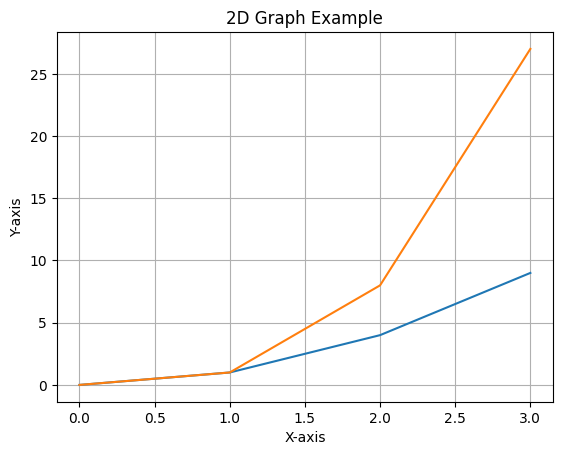

In [21]:
x = [0, 1, 2, 3]
y = [0, 1, 4, 9]
x_1 = [0, 1, 2, 3]
y_1 = [0, 1, 8, 27]

# Create the plot
plt.plot(x, y)
plt.plot(x_1, y_1)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("2D Graph Example")
plt.grid(True)  # Add grid lines
plt.show()